## Data description

The Mall Customer Segmentation Data is a dataset that contains information about customers in a mall. It's often used for customer segmentation and clustering analysis. The dataset provides features that can help identify different segments of customers based on their spending behavior and other characteristics. 

Here's a description of the columns in the dataset:

- `CustomerID:` A unique identifier for each customer.

- `Gender:` The gender of the customer (e.g., "Male" or "Female").

- `Age:` The age of the customer.

- `Annual Income (k$):` The annual income of the customer in thousands of dollars.

- `Spending Score (1-100):` A score assigned to the customer based on their spending behavior and perceived shopping habits. The score ranges from 1 to 100, where higher scores indicate higher spending.

## Main objectives of this analysis

In this analysis we will be performing customer segmentation and understanding different customer profiles based on their age, income, and spending behavior. 

The goal of using this dataset for unsupervised learning is often to group customers into segments or clusters in a way that maximizes the similarity within each cluster and maximizes the dissimilarity between clusters.

By applying clustering algorithms like K-means, hierarchical clustering, or DBSCAN to this dataset, we can identify different customer segments with distinct characteristics.

This information can be valuable for targeted marketing strategies, personalized promotions, and optimizing store layouts to cater to the preferences of different customer segments.

## Data preprocessing

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [278]:
df = pd.read_csv("Mall_Customers.csv", index_col=False)

In [279]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [280]:
df.duplicated().sum()

0

&#8594; No missing or duplicated values

In [281]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


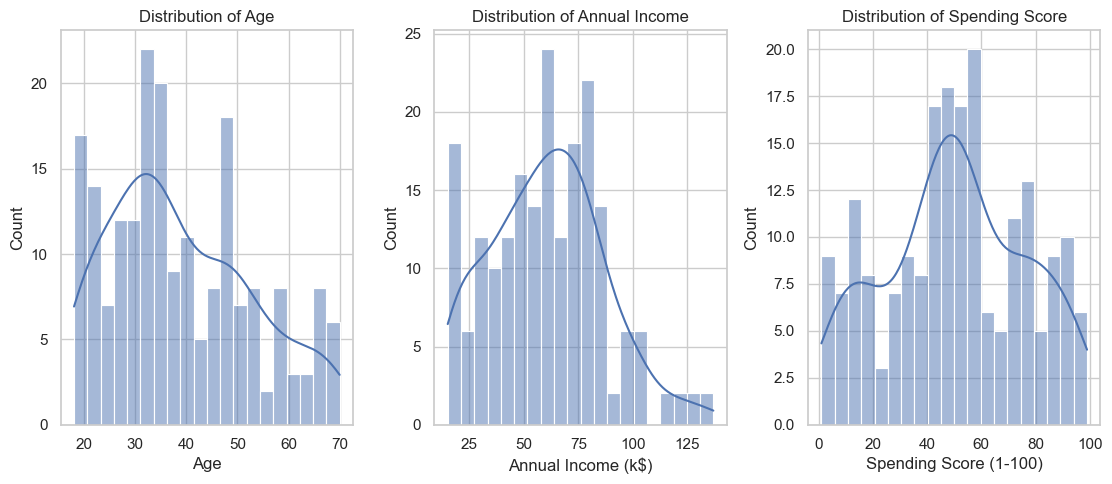

In [282]:
##Ploting distribution of Age, Annual Income (k$) and Spending Score (1-100)

# Set style for visualizations
sns.set(style="whitegrid")

# Histograms of Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution of Age")

plt.subplot(1, 4, 2)
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Distribution of Annual Income")

plt.subplot(1, 4, 3)
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Distribution of Spending Score")

plt.tight_layout()
plt.show()

In [283]:
# Calculate skewness for numerical columns

skewness = df.select_dtypes(include=["float64", "int64"]).apply(lambda x: x.skew())
skewness_threshold = 0.5
columns_to_transform = skewness[skewness > skewness_threshold].index
columns_to_transform
skewness

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

&#8594; All features show balanced skewness, so no changes are needed

In [284]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Scatter plot of Age vs Spending Score

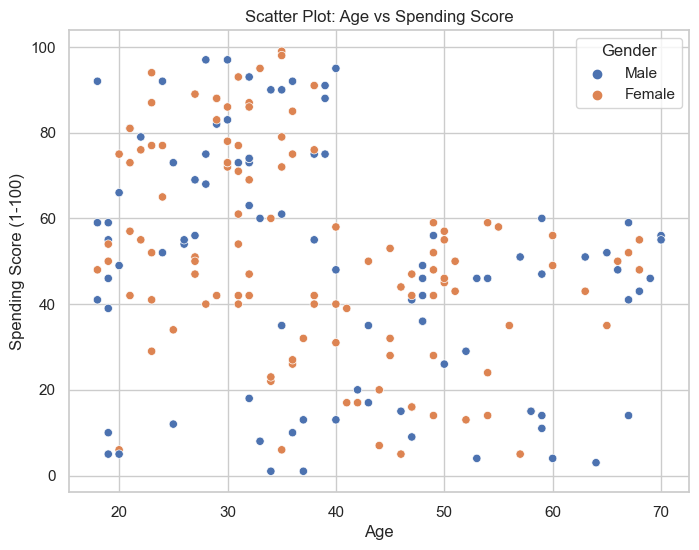

In [285]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Scatter Plot: Age vs Spending Score")
plt.show()

## Scatter plot of Annual Income vs Spending Score

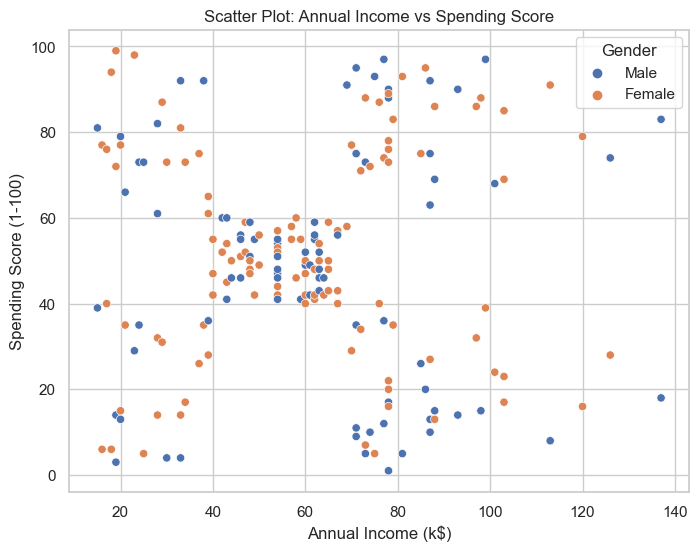

In [286]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Scatter Plot: Annual Income vs Spending Score")
plt.show()

&#8594; We can already see five clusters by annual income, and we're going to experiment with different cluster values using k-means to observe its effects.

In [287]:
#Scaling the columns before using K-means

columns_to_scale = ['Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [288]:
#Function to fit K-means

def fitKMeans(num_clusters, features, data=df):
    X = data[features]
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    df["Cluster"] = kmeans.labels_
    return kmeans

In [289]:
#Function to plot scatterplots

def plot(x, y, data=df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, hue="Cluster", palette="Set1")
    plt.title("Scatter Plot: {} vs {} with Clusters".format(x, y))
    plt.show()

## Scatter plots with different clusters

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


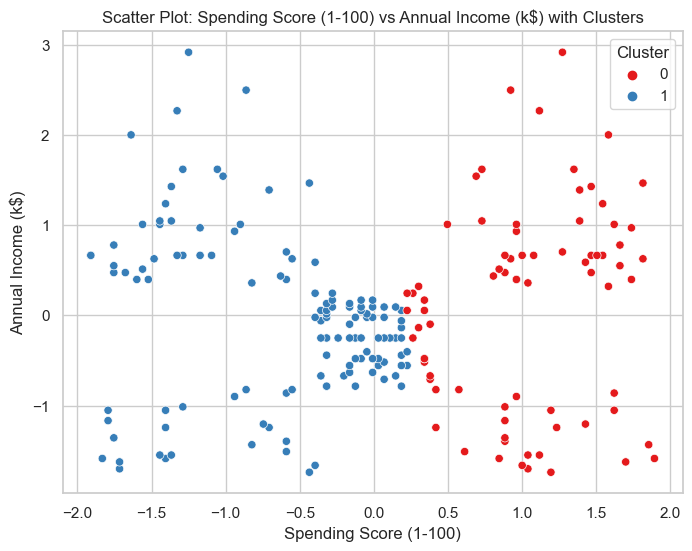

In [290]:
fitKMeans(2, ["Annual Income (k$)", "Spending Score (1-100)"])
plot("Spending Score (1-100)", "Annual Income (k$)")

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


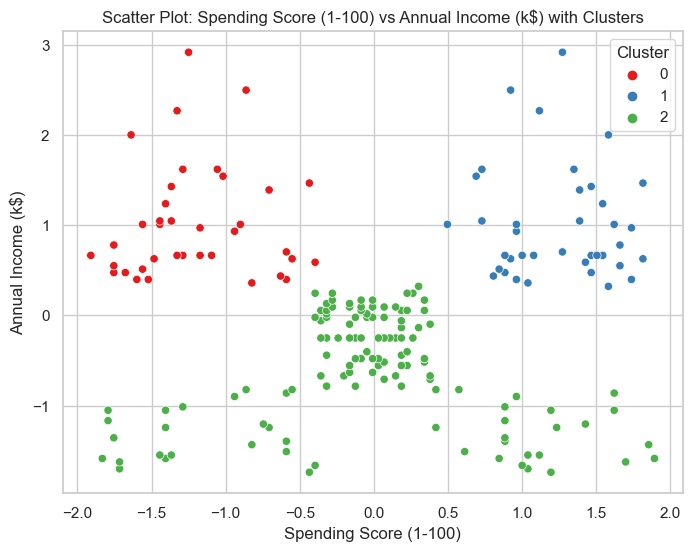

In [291]:
fitKMeans(3, ["Annual Income (k$)", "Spending Score (1-100)"])
plot("Spending Score (1-100)", "Annual Income (k$)")

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


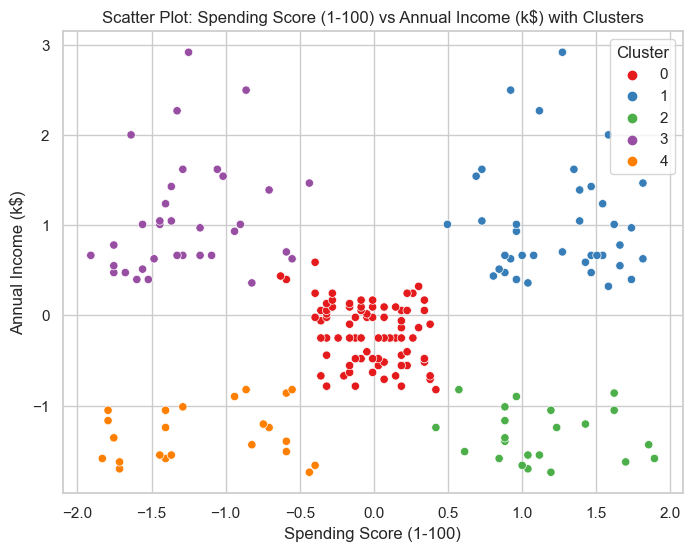

In [292]:
fitKMeans(5, ["Annual Income (k$)", "Spending Score (1-100)"])
plot("Spending Score (1-100)", "Annual Income (k$)")

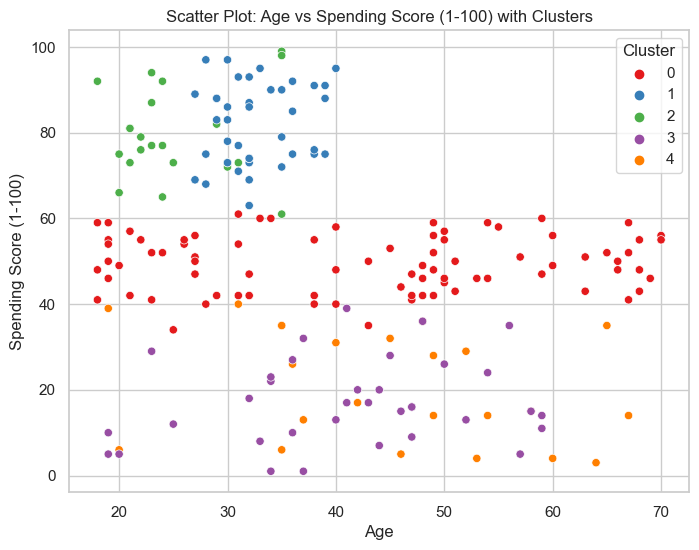

In [293]:
df_original = df_original.assign(Cluster=df['Cluster'])
plot("Age", "Spending Score (1-100)", df_original)

## Elbow method

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

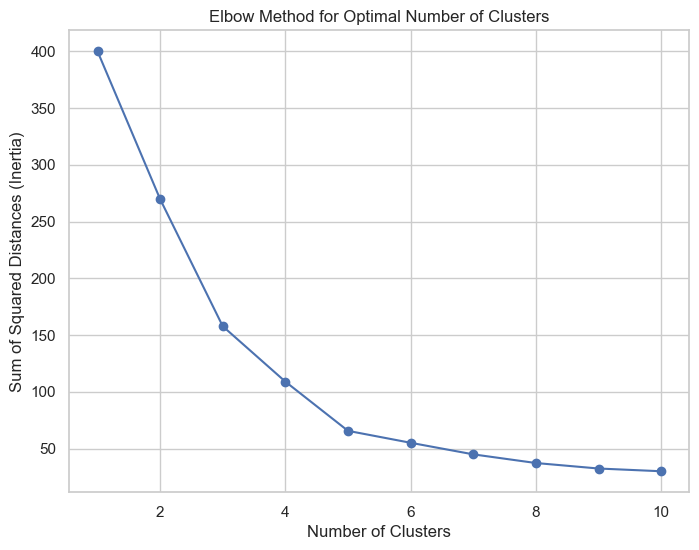

In [294]:
# List to store sum of squared distances
inertia = []

# Calculate inertia for each cluster number
for k in cluster_range:
    kmeans = fitKMeans(k, ["Annual Income (k$)", "Spending Score (1-100)"])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

With the elbow method, we can determine that 5 is the appropriate number of clusters.

## Plotting cluster centers

In [295]:
kmeans = fitKMeans(5, ["Annual Income (k$)", "Spending Score (1-100)"])
cluster_centers = kmeans.cluster_centers_
cluster_centers

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [296]:
columns=df.columns
columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

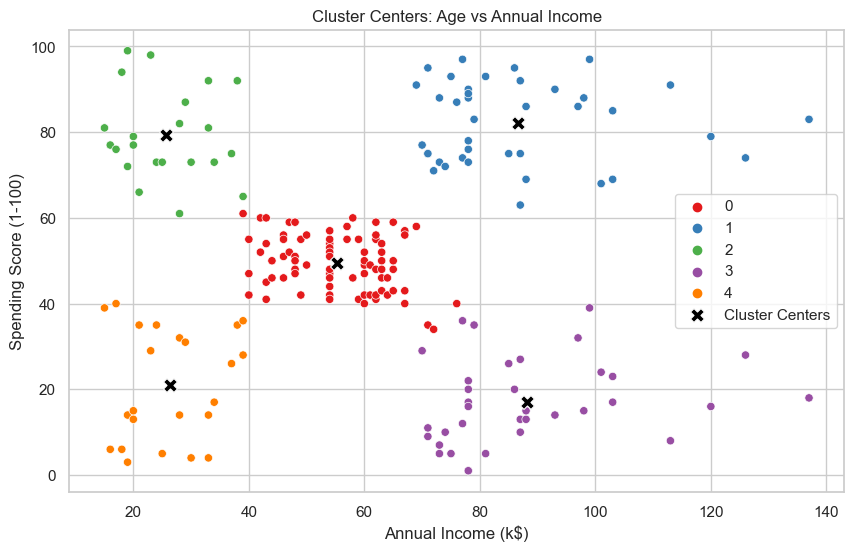

In [297]:
# Calculate cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame to hold cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

sns.set(style="whitegrid")

# Plot cluster centers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_original, x="Annual Income (k$)",  y="Spending Score (1-100)", hue="Cluster", palette="Set1")
sns.scatterplot(data=cluster_centers_df, x="Annual Income (k$)", y="Spending Score (1-100)", s=100, color="black", marker="X", label="Cluster Centers")
plt.title("Cluster Centers: Age vs Annual Income")
plt.legend()
plt.show()

In [298]:
cluster_centers_df.head()

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


## Heatmap

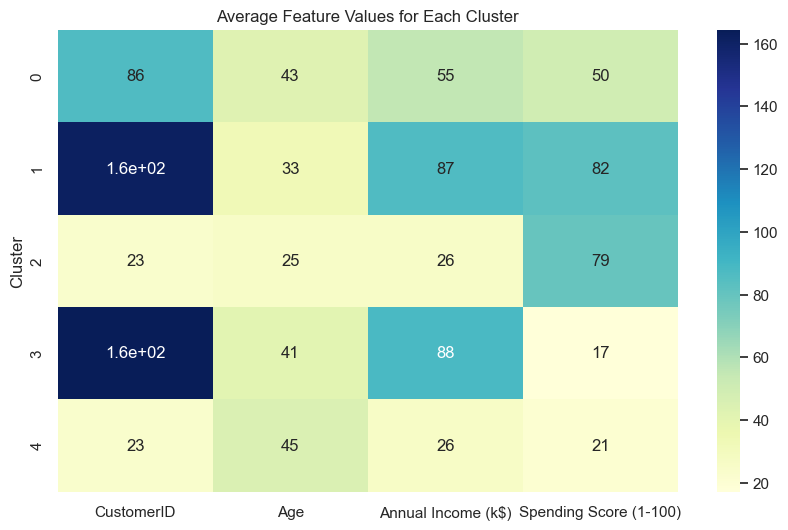

In [299]:
# Add cluster labels to the original data
df_original["Cluster"] = cluster_labels

# Create a DataFrame for heatmap
heatmap_data = df_original.groupby("Cluster").mean()

# Set style for visualizations
sns.set(style="whitegrid")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Average Feature Values for Each Cluster")
plt.show()

We've assigned names to each cluster based on the heatmap findings:

- Cluster 0: "Moderate Shoppers" (average age 43, medium income, and moderate spending)
- Cluster 1: "High-End Shoppers" (average age 33, high income, and high spending)
- Cluster 2: "Youthful Extravagance" (average age 25, lower income, and high spending)
- Cluster 3: "Sensible Savers" (average age 41, high income, and controlled spending)
- Cluster 4: "Cautious Shoppers" (average age 45, lower income, and conservative spending)

Additionally, the heatmap reveals interesting cluster distributions. "Youthful Extravagance" and "Cautious Shoppers" are less common, while "High-End Shoppers" and "Sensible Savers" are more prevalent. "Moderate Shoppers" fall in between.

These insights guide us in better understanding customer behavior, helping us tailor strategies for enhanced engagement and satisfaction.

## Prepare data for classification

In [300]:
X=df_original.iloc[:,1:5]
y=df_original.iloc[:,-1]

In [301]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [302]:
y

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [304]:
le=LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
standardScaler = StandardScaler()

X_train=standardScaler.fit_transform(X_train)
X_test=standardScaler.transform(X_test)

In [307]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [308]:
gradientBoostingClassifier = GradientBoostingClassifier(n_estimators=50,random_state=2)
gradientBoostingClassifier.fit(X_train,y_train)
y_pred=gradientBoostingClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

In [309]:
y_pred=gradientBoostingClassifier.predict(X_test)
y_pred

array([0, 2, 4, 3, 3, 0, 0, 3, 3, 0, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 3, 4,
       3, 0, 0, 0, 0, 0, 1, 0, 2, 4, 0, 0, 3, 0, 1, 1, 3, 0])

In this analysis, we employed the k-means clustering algorithm with 5 clusters to segment the dataset based on key features. Subsequently, the clustered data was used to train a gradient boosting algorithm for predictive modeling. The results provide valuable insights into customer behavior and purchasing patterns. However, it's essential to acknowledge potential limitations and plan for future improvements.

To refine and enhance the analysis, we can consider athering additional customer data, such as purchase history, demographic information, and online behavior, could provide a more comprehensive picture. This enriched dataset might lead to improved cluster separation and more accurate predictive models.

Investigate other predictive modeling techniques beyond gradient boosting. Methods like random forests, support vector machines, or neural networks might uncover hidden patterns in the data that were not captured by the initial approach

By addressing these potential flaws and embracing a comprehensive plan of action, we can revisit this analysis with a stronger foundation, unlocking deeper insights and predictive accuracy. As the dataset expands and modeling techniques evolve, we are better positioned to derive actionable recommendations for the business.